# Process differential expression datasets of oligodendrocyte differentiation

In [1]:
import pandas
import numpy

%matplotlib inline

In [2]:
columns = ['experiment', 'entrez_gene_id', 'gene_symbol', 'L2FC', 'p_value']

## Process Dugas dataset

In [3]:
url = 'https://gist.githubusercontent.com/dhimmel/45bcff9500cd99f85200/raw/fa13c2c96c59a53b5afe9ed02f8deef72813555d/OPC-differentiation-DEGs.tsv'
dugas_df = pandas.read_table(url)
dugas_df['L2FC'] = numpy.sign(dugas_df.fold_change) * numpy.log2(dugas_df.fold_change.abs())
dugas_df = dugas_df.rename(columns = {'hgnc_symbol_manual' : 'gene_symbol'})
dugas_df['experiment'] = 'in_vitro_rat_OPC_diff'
dugas_df = dugas_df.drop_duplicates('gene_symbol')
dugas_df = dugas_df[[x for x in columns if x in dugas_df.columns]]
dugas_df = dugas_df.dropna()
dugas_df.head(2)

,experiment,gene_symbol,L2FC
0,in_vitro_rat_OPC_diff,MOBP,6.900021
1,in_vitro_rat_OPC_diff,MBP,6.620000


In [4]:
len(dugas_df)

90

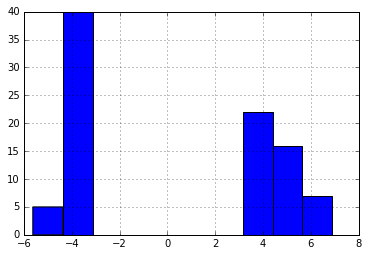

In [5]:
dugas_df.L2FC.hist();

## Process Antel dataset

Here I assume that `logFC` refers to log2 fold change, which may not be correct

In [6]:
antel_df = pandas.read_excel('download/Jack_Antel (A+_A-)_forDaniel.xlsx', skiprows=1)
antel_df = antel_df.rename(columns={'Entrez': 'entrez_gene_id', 'Symbol': 'gene_symbol', 'logFC': 'L2FC', 'adj.P.Val': 'p_value'})
antel_df = antel_df.sort_values('p_value').drop_duplicates('entrez_gene_id')
antel_df['experiment'] = 'human_OPC_diff'
antel_df = antel_df[columns]
antel_df = antel_df.dropna()
antel_df.head(2)

,experiment,entrez_gene_id,gene_symbol,L2FC,p_value
9,human_OPC_diff,3003,GZMK,2.296286,0.000747
2,human_OPC_diff,168537,GIMAP7,2.603272,0.001793


In [7]:
len(antel_df)

97

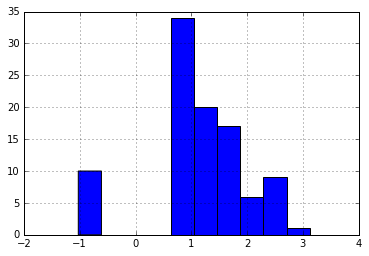

In [8]:
antel_df.L2FC.hist();

## Process iPS dataset

In [9]:
ips_df = pandas.read_excel('download/O4 Oligos vs NSCs(Log_FC)_for_Daniel.xlsx')
ips_df = ips_df.query("Group == 'Coding'")
ips_df = ips_df.rename(columns={'Gene Symbol': 'gene_symbol', 'Log_FC (O4H vs. NSCs)': 'L2FC', 'FDR p-value (O4H vs. NSCs)': 'p_value'})

In [10]:
ips_df['experiment'] = 'iPS_OPC_diff'
ips_df = ips_df[[x for x in columns if x in ips_df.columns]]
ips_df = ips_df.sort_values('p_value').drop_duplicates('gene_symbol')
ips_df = ips_df.dropna()
ips_df = ips_df.query("p_value <= 0.05")
ips_df = ips_df[ips_df.L2FC.abs() >= 4]
ips_df.head(2)

,experiment,gene_symbol,L2FC,p_value
0,iPS_OPC_diff,BCAN,8.52,0.0
22,iPS_OPC_diff,IGDCC3,-5.93,0.0


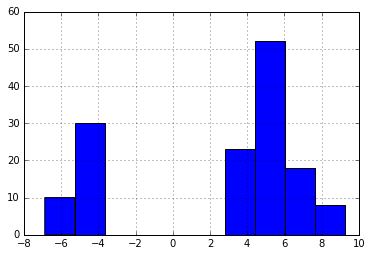

In [11]:
ips_df.L2FC.hist();

## Combine datasets

In [12]:
opc_diff_df = pandas.concat([dugas_df, ips_df, antel_df])

In [13]:
opc_diff_df.experiment.value_counts()

iPS_OPC_diff             141
human_OPC_diff            97
in_vitro_rat_OPC_diff     90
Name: experiment, dtype: int64

In [15]:
opc_diff_df.to_csv('data/OPC-differentiation-diffex-genes.tsv', sep='\t', index=False, float_format='%.3g')